In [1]:
import glob
from os.path import basename
import pandas as pd

data = []
for index, input_file in enumerate(glob.iglob(pathname='/kaggle/input/multi-weather-pothole-detection-mwpd/Multi-Weather Pothole Detection (MWPD)/MWPD/*/labels/*.txt')):
    values = pd.read_csv(filepath_or_buffer=input_file, sep=' ', header=None)
    values['file'] = basename(input_file) 
    data.append(values)
        
df = pd.concat(objs=data, axis='index').drop(columns=[0])

In [2]:
df.columns

Index([1, 2, 3, 4, 'file'], dtype='object')

In [3]:
import arrow
from sklearn.manifold import TSNE

time_start = arrow.now()
reducer = TSNE(random_state=2025, verbose=True, n_jobs=1, perplexity=100.0, )
df[['x', 'y']] = reducer.fit_transform(X=df[[1, 2, 3, 4]].apply(func=pd.Series))
print('done with TSNE in {}'.format(arrow.now() - time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7331 samples in 0.007s...
[t-SNE] Computed neighbors for 7331 samples in 0.718s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7331
[t-SNE] Computed conditional probabilities for sample 2000 / 7331
[t-SNE] Computed conditional probabilities for sample 3000 / 7331
[t-SNE] Computed conditional probabilities for sample 4000 / 7331
[t-SNE] Computed conditional probabilities for sample 5000 / 7331
[t-SNE] Computed conditional probabilities for sample 6000 / 7331
[t-SNE] Computed conditional probabilities for sample 7000 / 7331
[t-SNE] Computed conditional probabilities for sample 7331 / 7331
[t-SNE] Mean sigma: 0.064281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.197769
[t-SNE] KL divergence after 1000 iterations: 1.116110
done with TSNE in 0:00:52.348520


<Axes: xlabel='x', ylabel='y'>

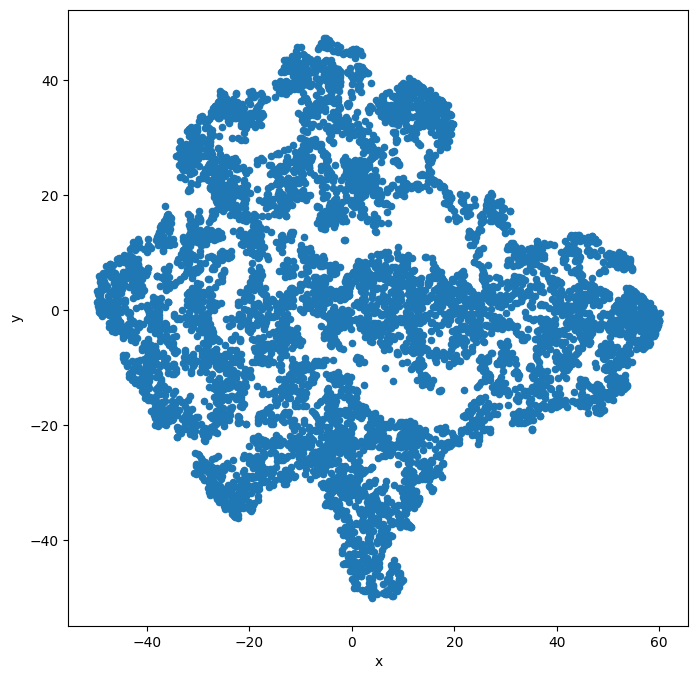

In [4]:
df[['x', 'y']].plot(kind='scatter', x='x', y='y', figsize=(8, 8))